In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

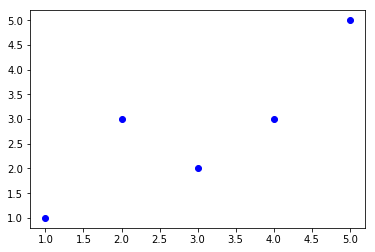

In [2]:
x = np.array([1,2,4,3,5])
y = np.array([1,3,3,2,5])
plt.plot(x,y, 'o', color='blue')
plt.show()

### The Equation
y = B0 + B1 * x


B1 = $\frac{\sum\limits_{i=0}^{n}(x_i - mean(x)) * (y_i - mean(y)}{\sum\limits_{i=0}^{n}(x_i - mean(x))^2}$ 

or

B1 = corr(x,y) * $\frac{stdev(y)}{stdev(x)}$

B0 = mean(y) - B1 * mean(x)

### Error Estimation

RMSE = $\sqrt{\frac{\sum\limits_{i=0}^{n}(p_i - y_i)^2}{n}}$


In [3]:
# Estimating The Slope (B1)

print('x: ', x)
meanX = np.mean(x)
print('mean(x):', meanX)
x_meanX =  x - meanX
print('x - mean(x):', x_meanX)

print('y:', y)
meanY = np.mean(y)
print('mean(y):', meanY)
y_meanY = y - meanY
print('y - mean(y)', y_meanY)

print('x - mean(x)', x_meanX)
print('y- mean(y', y_meanY)
print('multiplication:', x_meanX * y_meanY)

print('x - mean(x)', x_meanX)
print('square', x_meanX * x_meanX)

B1 = np.sum((x_meanX * y_meanY))/ np.sum((x_meanX * x_meanX))
B1

x:  [1 2 4 3 5]
mean(x): 3.0
x - mean(x): [-2. -1.  1.  0.  2.]
y: [1 3 3 2 5]
mean(y): 2.8
y - mean(y) [-1.8  0.2  0.2 -0.8  2.2]
x - mean(x) [-2. -1.  1.  0.  2.]
y- mean(y [-1.8  0.2  0.2 -0.8  2.2]
multiplication: [ 3.6 -0.2  0.2 -0.   4.4]
x - mean(x) [-2. -1.  1.  0.  2.]
square [ 4.  1.  1.  0.  4.]


0.80000000000000004

In [4]:
# Estimating The Intercept (B0)
B0 = np.mean(y) - B1 * np.mean(x)
B0

0.39999999999999947

In [5]:
# Making Prediction
# y = B0 + B1 * x
for i in x:
    print('x: {}, predicted Y: {}'.format(i, B0 + B1 * i))


x: 1, predicted Y: 1.1999999999999995
x: 2, predicted Y: 1.9999999999999996
x: 4, predicted Y: 3.5999999999999996
x: 3, predicted Y: 2.8
x: 5, predicted Y: 4.3999999999999995


In [6]:
# Estimating Error
predicted = ([B0 + B1 * i for i in x])
predicted_Y = predicted -y
print('Predicted:', predicted)
print('Y:', y)
print('Predicted -y:', predicted_Y)

#(error × error or error ^ 2 )
print('squared error', predicted_Y * predicted_Y)
RMSE = math.sqrt(np.sum(predicted_Y * predicted_Y) / len(x))
RMSE

Predicted: [1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.7999999999999998, 4.3999999999999995]
Y: [1 3 3 2 5]
Predicted -y: [ 0.2 -1.   0.6  0.8 -0.6]
squared error [ 0.04  1.    0.36  0.64  0.36]


0.692820323027551

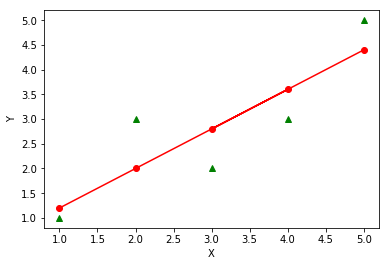

In [7]:
plt.plot(x,y, 'g^')
plt.plot( x, predicted, 'ro-', label='Theoretical')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [8]:
# combine
# cal B1
class SimpleLinearRegression:
    def __init__(self):
        self.B0 = 0
        self.B1 = 0

    def calB0B1(self, X, Y):
        meanX = np.mean(X)
        x_meanX =  X - meanX

        meanY = np.mean(Y)
        y_meanY = Y - meanY

        self.B1 = np.sum((x_meanX * y_meanY))/ np.sum((x_meanX * x_meanX))
        self.B0 = meanY - self.B1 * meanX
    
    def fit(self, X,y):
        self.calB0B1(X, y)
    
    def predict(self, x):
        return self.B0 + self.B1 * x


In [9]:
#test
model = SimpleLinearRegression()
model.fit(x,y)
for i in x:
    print('predict:', model.predict(i))

predict: 1.2
predict: 2.0
predict: 3.6
predict: 2.8
predict: 4.4


In [10]:
model.predict(10)

8.3999999999999986